In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

random_state = 9

## Carga los datos del dataset

Los datos son un dataset que identifica la calidad de los vinos blancos, en un rango del 1 al 10

In [77]:
# dataframe = pd.read_csv('dataset/acceptor_arabidopsis_315_binary.txt', sep='	')
dataframe = pd.read_csv('dataset/winequality-white.csv', sep=';')
# dataframe = pd.read_csv('dataset/nba_Target.csv', sep=',')
# dataframe = pd.read_csv('dataset/iris.csv', sep=',')
dataset = dataframe.values
X = dataset[:,0:-1].astype(float)
Y = dataset[:,-1]

In [78]:
dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [79]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=random_state,stratify=Y)

print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array([3., 4., 5., 6., 7., 8., 9.]), array([  16,  130, 1166, 1758,  704,  140,    4]))
(array([3., 4., 5., 6., 7., 8., 9.]), array([  4,  33, 291, 440, 176,  35,   1]))


# Modelos de clasificación


## k-Nearest Neighbors

In [80]:
from sklearn.neighbors import KNeighborsClassifier

k_values = np.arange(2, 20)
best_knn_model = None
knn_best_accuracy = 0

train_accuracy = np.empty(len(k_values))
test_accuracy = np.empty(len(k_values))

for i,k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    accuracy = knn.score(X_test,y_test)
    # print("k = %d, accuracy = %.2f%%" % (k, accuracy * 100))
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test,y_test)
    if accuracy > knn_best_accuracy:
        knn_best_accuracy = accuracy
        best_knn_model = knn



In [81]:
print("Best accuracy: %.2f%%" % (knn_best_accuracy * 100))
best_knn_model

Best accuracy: 50.92%


KNeighborsClassifier()

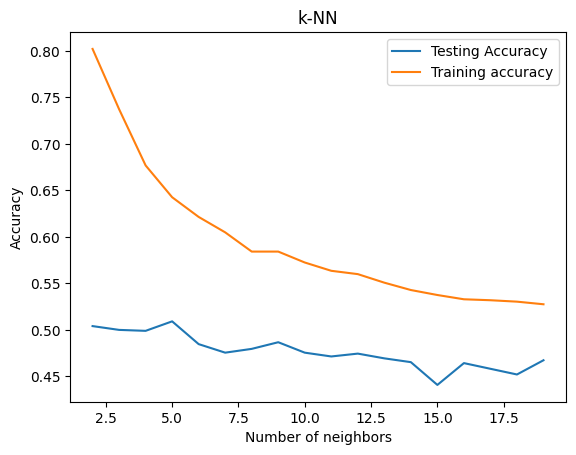

In [82]:
plt.title('k-NN')
plt.plot(k_values, test_accuracy, label='Testing Accuracy')
plt.plot(k_values, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

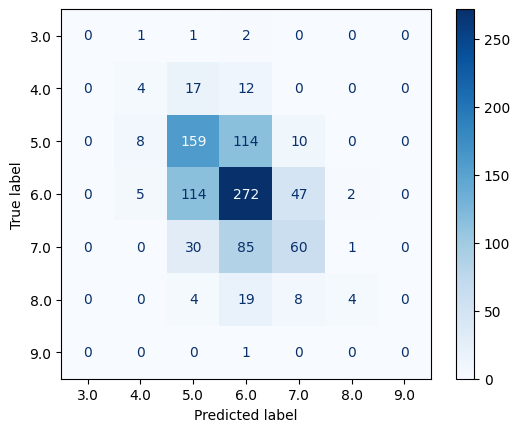

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_knn_model.predict(X_test)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=best_knn_model.classes_)
disp.plot(cmap=plt.cm.Blues)

## Red neuronal

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


hidden_layer_sizes = [(100,), (50, 50), (100, 50, 25), (75, 50, 10), (100, 50, 25, 10)]
best_nn_model = None
nn_best_accuracy = 0

for i,hidden_layers in enumerate(hidden_layer_sizes):
    nn = MLPClassifier(hidden_layer_sizes=hidden_layers, solver='adam', activation="relu", random_state=random_state)
    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for Neural Network (hidden layers={hidden_layers}): {accuracy}")
    if accuracy > nn_best_accuracy:
        nn_best_accuracy = accuracy
        best_nn_model = nn



Accuracy for Neural Network (hidden layers=(100,)): 0.4897959183673469
Accuracy for Neural Network (hidden layers=(50, 50)): 0.45408163265306123
Accuracy for Neural Network (hidden layers=(100, 50, 25)): 0.5163265306122449
Accuracy for Neural Network (hidden layers=(75, 50, 10)): 0.4928571428571429
Accuracy for Neural Network (hidden layers=(100, 50, 25, 10)): 0.513265306122449


In [85]:
print("Best accuracy: %.2f%%" % (nn_best_accuracy * 100))
print("Best Neural Network hidden layers sizes:", best_nn_model.hidden_layer_sizes)

Best accuracy: 51.63%
Best Neural Network hidden layers sizes: (100, 50, 25)


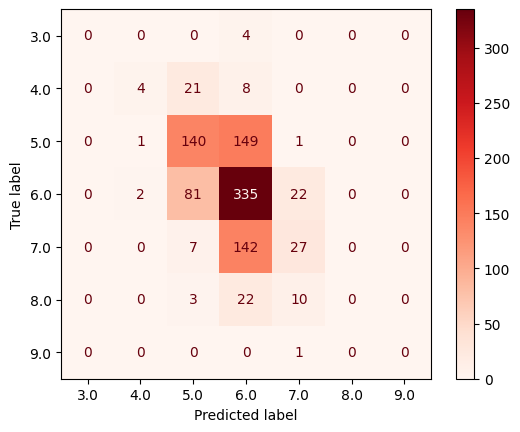

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_nn_model.predict(X_test)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=best_nn_model.classes_)
disp.plot(cmap=plt.cm.Reds)

## Support Vector Machine

In [87]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for SVM: {svm_accuracy}")


Accuracy for SVM: 0.4489795918367347


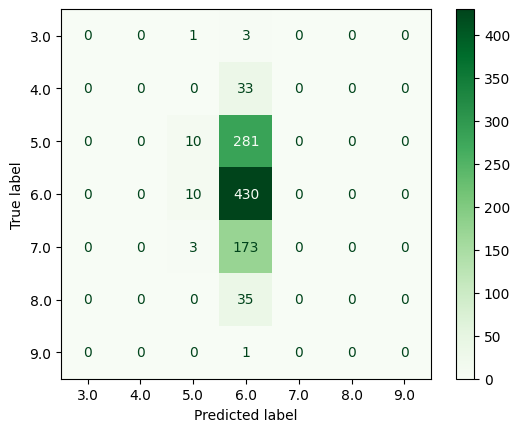

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = svm.predict(X_test)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=svm.classes_)
disp.plot(cmap=plt.cm.Greens)

## Arbol de decisión

In [89]:
from sklearn import tree
import graphviz

dtc = tree.DecisionTreeClassifier(random_state=random_state)
dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Decision Tree: {tree_accuracy}")


Accuracy for Decision Tree: 0.6183673469387755


In [90]:
dot_data = tree.export_graphviz(dtc, out_file=None,
                     feature_names=dataframe.columns[:-1],
                     class_names=dataframe.iloc[:,-1].unique().astype(str),
                     filled=True, rounded=True,
                     special_characters=True)
DT = graphviz.Source(dot_data)
DT

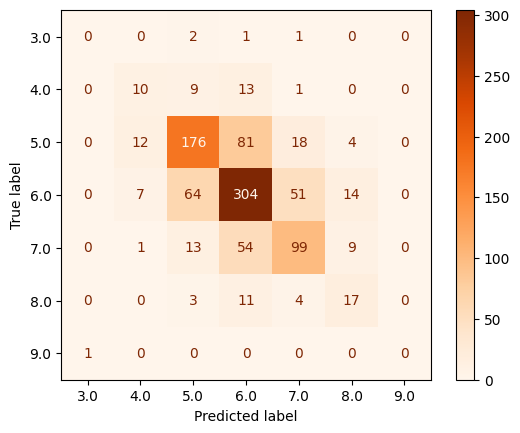

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = dtc.predict(X_test)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=dtc.classes_)
disp.plot(cmap=plt.cm.Oranges)

## Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Naive Bayes: {gnb_accuracy}")

Accuracy for Naive Bayes: 0.44693877551020406


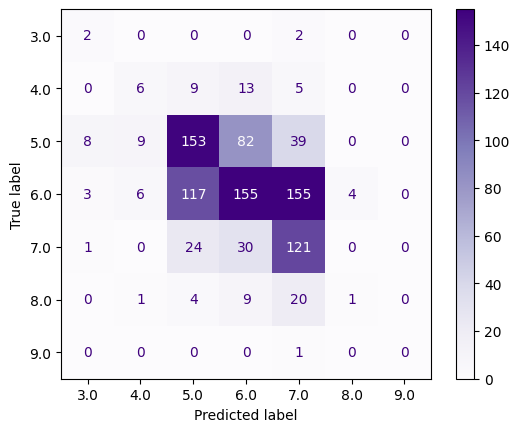

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = gnb.predict(X_test)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=gnb.classes_)
disp.plot(cmap=plt.cm.Purples)

## Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=random_state)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Random Forest: {rfc_accuracy}")

Accuracy for Random Forest: 0.6908163265306122


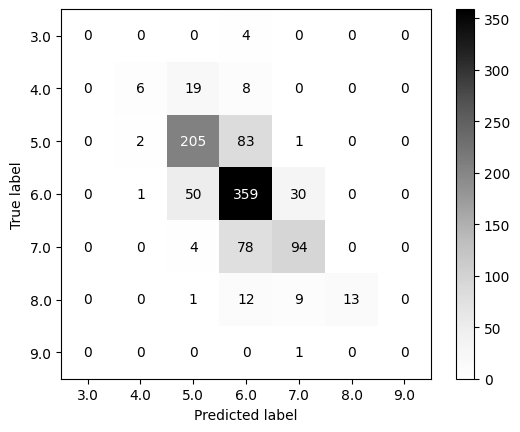

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rfc.predict(X_test)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=rfc.classes_)
disp.plot(cmap=plt.cm.Greys)

## AdaBoost

In [96]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(random_state=random_state)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
abc_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for AdaBoost: {abc_accuracy}")

Accuracy for AdaBoost: 0.4489795918367347


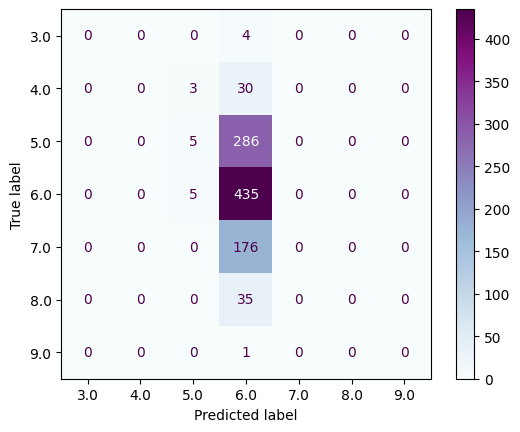

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = abc.predict(X_test)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=abc.classes_)
disp.plot(cmap=plt.cm.BuPu)

## Gradient Boosting

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=random_state)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
gbc_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Gradient Boosting: {gbc_accuracy}")

Accuracy for Gradient Boosting: 0.5826530612244898


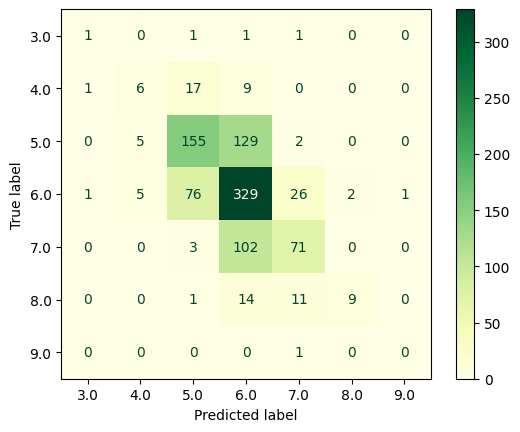

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = gbc.predict(X_test)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=gbc.classes_)
disp.plot(cmap=plt.cm.YlGn)

# Análisis de resultados

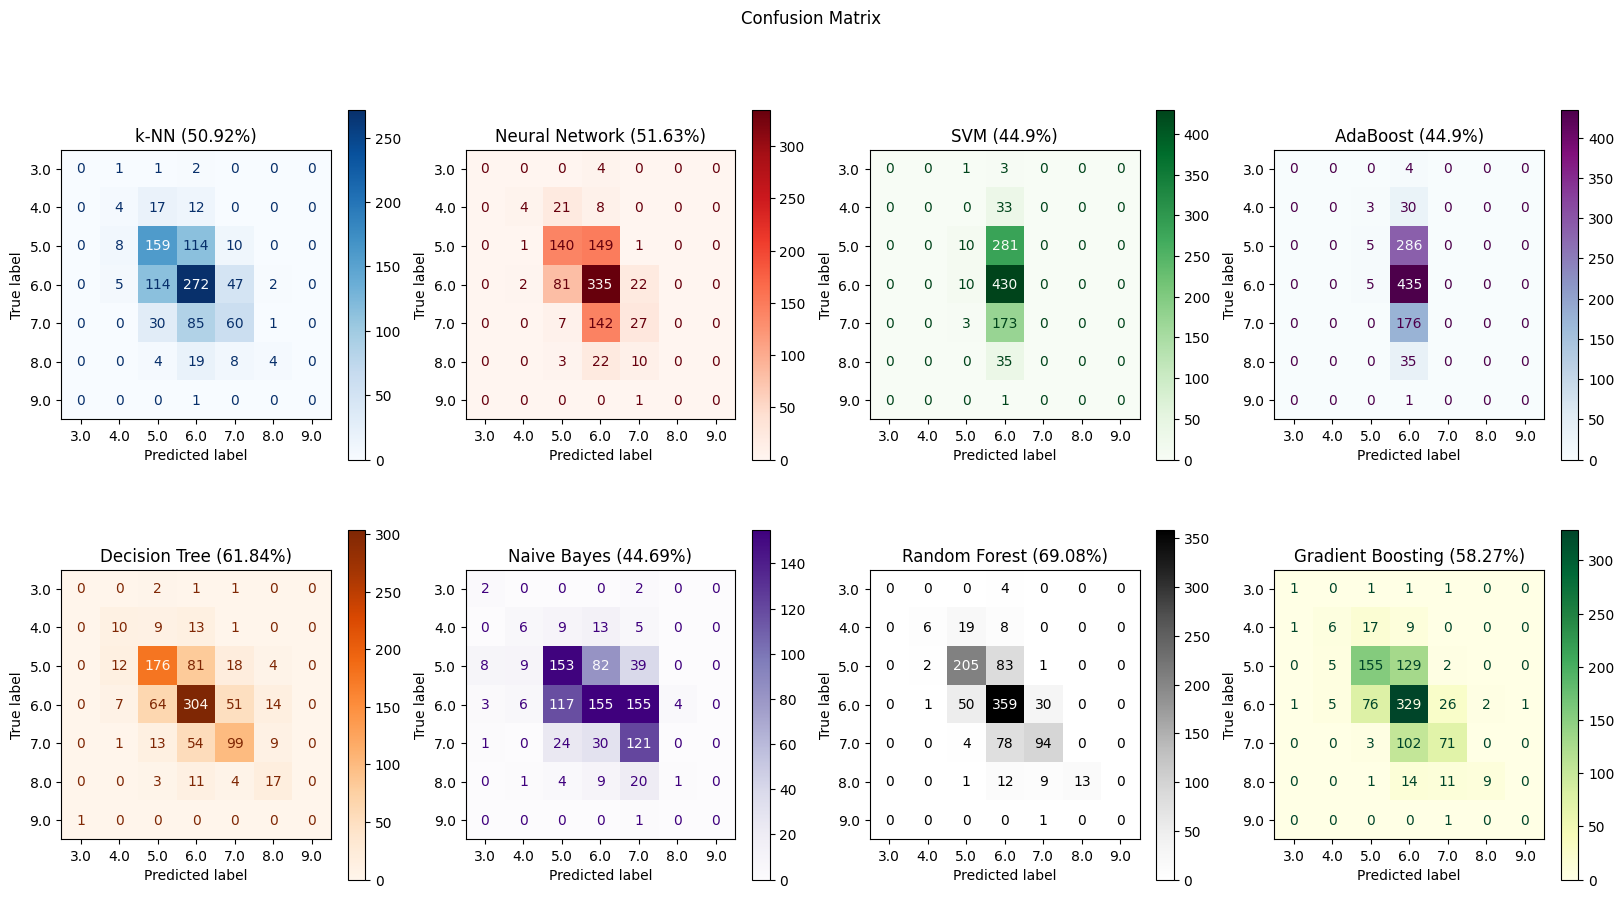

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Confusion Matrix')

y_pred = best_knn_model.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=best_knn_model.classes_)
disp.plot(ax=ax[0, 0], cmap=plt.cm.Blues)
ax[0, 0].set_title(f'k-NN ({str(round(knn_best_accuracy * 100, 2))}%)')

y_pred = best_nn_model.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=best_nn_model.classes_)
disp.plot(ax=ax[0, 1], cmap=plt.cm.Reds)
ax[0, 1].set_title(f'Neural Network ({str(round(nn_best_accuracy * 100, 2))}%)')

y_pred = svm.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=svm.classes_)
disp.plot(ax=ax[0, 2], cmap=plt.cm.Greens)
ax[0, 2].set_title(f'SVM ({str(round(svm_accuracy * 100, 2))}%)')

y_pred = dtc.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=dtc.classes_)
disp.plot(ax=ax[1, 0], cmap=plt.cm.Oranges)
ax[1, 0].set_title(f'Decision Tree ({str(round(tree_accuracy * 100, 2))}%)')

y_pred = gnb.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=gnb.classes_)
disp.plot(ax=ax[1, 1], cmap=plt.cm.Purples)
ax[1, 1].set_title(f'Naive Bayes ({str(round(gnb_accuracy * 100, 2))}%)')

y_pred = rfc.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=rfc.classes_)
disp.plot(ax=ax[1, 2], cmap=plt.cm.Greys)
ax[1, 2].set_title(f'Random Forest ({str(round(rfc_accuracy * 100, 2))}%)')

y_pred = abc.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=abc.classes_)
disp.plot(ax=ax[0, 3], cmap=plt.cm.BuPu)
ax[0, 3].set_title(f'AdaBoost ({str(round(abc_accuracy * 100, 2))}%)')

y_pred = gbc.predict(X_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=gbc.classes_)
disp.plot(ax=ax[1, 3], cmap=plt.cm.YlGn)
ax[1, 3].set_title(f'Gradient Boosting ({str(round(gbc_accuracy * 100, 2))}%)')

plt.show()